# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, 120)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x - 2 + np.random.normal(0, 2, 120)

indexes = np.argsort(x)

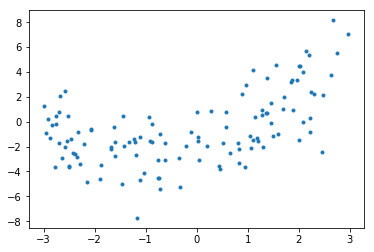

In [3]:
plt.scatter(x, y, marker=".")
plt.show()

#### 线性回归

In [4]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X, y)
y1_predict = reg1.predict(X)

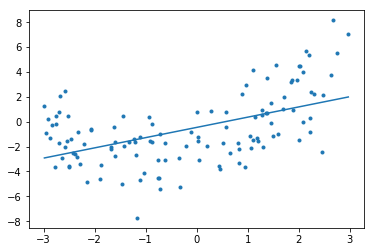

In [5]:
plt.scatter(x, y, marker=".")
plt.plot(x[indexes], y1_predict[indexes])
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y1_predict)

5.7091752165945344

#### 多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [8]:
def PolynominalRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [9]:
reg2 = PolynominalRegression(2)
reg2.fit(X, y)
y2_predict = reg2.predict(X)

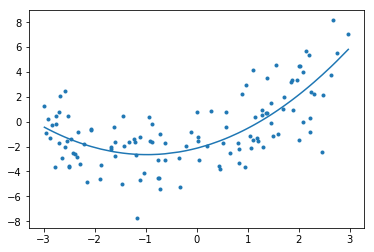

In [10]:
plt.scatter(x, y, marker=".")
plt.plot(x[indexes], y2_predict[indexes])
plt.show()

In [11]:
mean_squared_error(y, y2_predict)

3.850707094553429

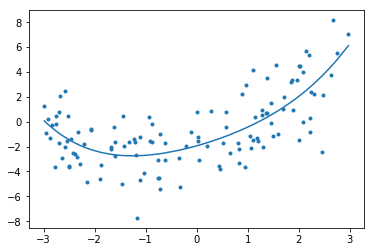

3.8257500931324708

In [13]:
reg4 = PolynominalRegression(4)
reg4.fit(X, y)
y4_predict = reg4.predict(X)

plt.scatter(x, y, marker=".")
plt.plot(x[indexes], y4_predict[indexes])
plt.show()

mean_squared_error(y, y4_predict)

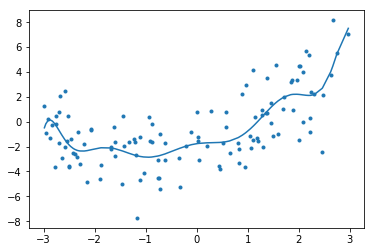

3.6469945792080347

In [14]:
reg10 = PolynominalRegression(10)
reg10.fit(X, y)
y10_predict = reg10.predict(X)

plt.scatter(x, y, marker=".")
plt.plot(x[indexes], y10_predict[indexes])
plt.show()

mean_squared_error(y, y10_predict)

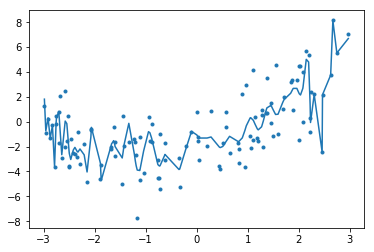

2.3582267863628572

In [15]:
reg100 = PolynominalRegression(100)
reg100.fit(X, y)
y100_predict = reg100.predict(X)

plt.scatter(x, y, marker=".")
plt.plot(x[indexes], y100_predict[indexes])
plt.show()

mean_squared_error(y, y100_predict)

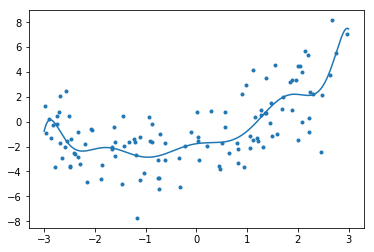

In [17]:
cx = np.linspace(-3, 3, 961)
cy = reg10.predict(cx.reshape(-1, 1))
plt.scatter(x, y, marker=".")
plt.plot(cx, cy)
plt.show()

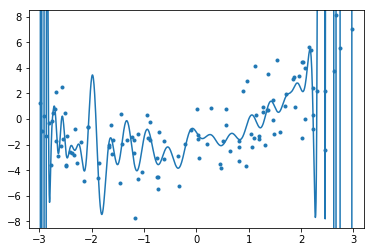

In [19]:
cx = np.linspace(-3, 3, 961)
cy = reg100.predict(cx.reshape(-1, 1))
plt.scatter(x, y, marker=".")
plt.plot(cx, cy)
plt.axis([-3.2, 3.2, -8.5, 8.5])
plt.show()

#### train test split的意义

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [22]:
reg1 = PolynominalRegression(1)
reg1.fit(X_train, y_train)
reg1.score(X_test, y_test)

0.2753891782051302

In [23]:
reg2 = PolynominalRegression(2)
reg2.fit(X_train, y_train)
reg2.score(X_test, y_test)

0.53829700519784052

In [24]:
reg4 = PolynominalRegression(4)
reg4.fit(X_train, y_train)
reg4.score(X_test, y_test)

0.54049859662790278

In [25]:
reg10 = PolynominalRegression(10)
reg10.fit(X_train, y_train)
reg10.score(X_test, y_test)

0.50201284423998005

In [26]:
reg100 = PolynominalRegression(100)
reg100.fit(X_train, y_train)
reg100.score(X_test, y_test)

-158890171198.86703